¡Hola, Valentina!

Mi nombre es Tonatiuh Cruz. Me complace revisar tu proyecto hoy.

Al identificar cualquier error inicialmente, simplemente los destacaré. Te animo a localizar y abordar los problemas de forma independiente como parte de tu preparación para un rol como data-scientist. En un entorno profesional, tu líder de equipo seguiría un enfoque similar. Si encuentras la tarea desafiante, proporcionaré una pista más específica en la próxima iteración.

Encontrarás mis comentarios a continuación - **por favor no los muevas, modifiques o elimines**.

Puedes encontrar mis comentarios en cajas verdes, amarillas o rojas como esta:

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Éxito. Todo está hecho correctamente.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Observaciones. Algunas recomendaciones.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Necesita corrección. El bloque requiere algunas correcciones. El trabajo no puede ser aceptado con comentarios en rojo.
</div>

Puedes responderme utilizando esto:

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante.</b> <a class="tocSkip"></a>
    Gracias por los comentarios. He corregido los puntos señalados: redondeé correctamente los minutos y gigabytes en el cálculo del ingreso, eliminé los outliers antes de realizar las pruebas de hipótesis y convertí todas las fechas relevantes a formato datetime. Y varias cositas más. Quedo atenta a la segunda revisión.

<div class="alert alert-block alert-success">
<b>Resumen de la revisión 1</b> <a class="tocSkip"></a>

Hola Valentina! Has hecho un excelente trabajo con el proyecto, cada vez más cercas de convertirte en un cientifica de datos. Realizaste la carga de bases, su análisis inicial, sus ajustes, un análisis de algunos variables conmplementado con gráficas y el desarrollo de las pruebas d ehipótesis. Solamente te dejo algunos comentarios para complementar el análisis. 

Sigue con el excelente trabajo!
</div>

# ¿Cuál es la mejor tarifa?

Trabajas como analista para el operador de telecomunicaciones Megaline. La empresa ofrece a sus clientes dos tarifas de prepago, Surf y Ultimate. El departamento comercial quiere saber cuál de las tarifas genera más ingresos para poder ajustar el presupuesto de publicidad.

Vas a realizar un análisis preliminar de las tarifas basado en una selección de clientes relativamente pequeña. Tendrás los datos de 500 clientes de Megaline: quiénes son los clientes, de dónde son, qué tarifa usan, así como la cantidad de llamadas que hicieron y los mensajes de texto que enviaron en 2018. Tu trabajo es analizar el comportamiento de los clientes y determinar qué tarifa de prepago genera más ingresos.

Antes de empezar con el análisis, el objetivo de este proyecto es averiguar cuál de los dos planes prepago, Surf o Ultimate, genera más ingresos para Megaline. Para eso, voy a cargar y preparar los datos, calcular el uso mensual de cada cliente (llamadas, mensajes e internet), estimar los ingresos que generan y luego comparar los resultados entre planes. También voy a hacer algunas pruebas estadísticas para ver si las diferencias son significativas. Con todo esto, buscaré sacar conclusiones claras sobre qué tarifa es más rentable.

## Inicialización

In [224]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math as m
# Cargar todas las librerías

<div class="alert alert-block alert-warning">
<b>Comentario revisor</b> <a class="tocSkip"></a>


Recomiendo cargar la libreria math. De esta manera, puedes realizar redondeos con otros métodos. 
</div>

<div class="alert alert-block alert-success">
<b>Comentario revisor</b> <a class="tocSkip"></a>


Gran trabajo con el ajuste!

## Cargar datos

In [225]:
users = pd.read_csv('/datasets/megaline_users.csv')
calls = pd.read_csv('/datasets/megaline_calls.csv')
messages = pd.read_csv('/datasets/megaline_messages.csv')
internet = pd.read_csv('/datasets/megaline_internet.csv')
plans = pd.read_csv('/datasets/megaline_plans.csv')
# Carga los archivos de datos en diferentes DataFrames

## Preparar los datos

## Tarifas

In [226]:
print(plans.info())
display(plans.describe())
# Imprime la información general/resumida sobre el DataFrame de las tarifas

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes
None


,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute
count,2.000000,2.000000,2.000000,2.000000,2.00000,2.000000,2.000000
mean,525.000000,23040.000000,1750.000000,45.000000,8.50000,0.020000,0.020000
std,671.751442,10861.160159,1767.766953,35.355339,2.12132,0.014142,0.014142
min,50.000000,15360.000000,500.000000,20.000000,7.00000,0.010000,0.010000
25%,287.500000,19200.000000,1125.000000,32.500000,7.75000,0.015000,0.015000
50%,525.000000,23040.000000,1750.000000,45.000000,8.50000,0.020000,0.020000
75%,762.500000,26880.000000,2375.000000,57.500000,9.25000,0.025000,0.025000
max,1000.000000,30720.000000,3000.000000,70.000000,10.00000,0.030000,0.030000


In [227]:
display(plans.head())
# Imprime una muestra de los datos para las tarifas

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


El DataFrame plans contiene 2 registros y 8 columnas, todas con valores completos y sin datos nulos. La mayoría de las columnas son de tipo int64 o float64, lo cual es adecuado para datos numéricos, mientras que plan_name es de tipo object, correcto para nombres de planes. Al observar los datos, se nota que un plan incluye 1000 mensajes y el otro solo 50, los minutos incluidos varían entre 500 y 3000, y el costo mensual va de 20 a 70 USD. También hay diferencias en los costos por GB, por mensaje y por minuto. La columna mb_per_month_included muestra el uso en megabytes, pero sería más claro convertirlo a gigabytes para que sea coherente con usd_per_gb. Además, reorganizar las columnas podría hacer que la información se interprete más fácilmente.

## Corregir datos

In [228]:
plans['gb_per_month_included'] = plans['mb_per_month_included'] // 1024
display(plans.head())

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,gb_per_month_included
0,50,15360,500,20,10,0.03,0.03,surf,15
1,1000,30720,3000,70,7,0.01,0.01,ultimate,30



<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Muy buen trabajo!! Es correcto considerar que 1024 megabytes son 1 gigabytes.
    
</div>

## Enriquecer los datos

In [229]:
plans = plans[['plan_name','usd_monthly_pay','minutes_included','usd_per_minute','messages_included','usd_per_message','gb_per_month_included','usd_per_gb']]
display(plans.head())


,plan_name,usd_monthly_pay,minutes_included,usd_per_minute,messages_included,usd_per_message,gb_per_month_included,usd_per_gb
0,surf,20,500,0.03,50,0.03,15,10
1,ultimate,70,3000,0.01,1000,0.01,30,7


## Usuarios/as

In [230]:
print(users.info())
display(users.describe())
# Imprime la información general/resumida sobre el DataFrame de usuarios

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB
None


,user_id,age
count,500.000000,500.000000
mean,1249.500000,45.486000
std,144.481833,16.972269
min,1000.000000,18.000000
25%,1124.750000,30.000000
50%,1249.500000,46.000000
75%,1374.250000,61.000000
max,1499.000000,75.000000


In [231]:
display(users.head())
# Imprime una muestra de datos para usuarios

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN


El DataFrame users tiene 500 registros y 8 columnas, y en general los datos se ven bastante completos, excepto en la columna churn_date, que tiene muchos valores nulos —lo cual es lógico, ya que solo 34 usuarios han dejado el servicio. Las columnas como user_id y age están en el tipo correcto (int64), mientras que las demás son de tipo object, lo cual está bien para texto o fechas que aún no han sido convertidas. Las fechas (reg_date y churn_date) deberían transformarse a formato datetime para facilitar análisis posteriores. Calcular la antigüedad del cliente en días te permite ver cuánto tiempo ha estado el usuario con Megaline, ideal para analizar lealtad o comportamiento según antigüedad.

### Corregir los datos

In [232]:
users['reg_date'] = pd.to_datetime(users['reg_date'], format='%Y-%m-%d')
users['churn_date'] = pd.to_datetime(users['churn_date'], format='%Y-%m-%d')
display(users.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    object        
 7   churn_date  34 non-null     datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB


None


<div class="alert alert-block alert-warning">
<b>Comentario Revisor</b> <a class="tocSkip"></a>

En todos los casos en los que cambiamos el tipo de variable a datetime, te recomiendo agregar el argumento "format='%Y-%m-%d'" dentro de la función to_datetime(). De esta manera, puedes asegurarte siempre de que el formato de la fecha que deseas cambiar sea el que necesitas.
</div>

### Enriquecer los datos

In [233]:
users['tenure_days'] = (pd.to_datetime('2018-12-31') - users['reg_date']).dt.days
display(users.head())

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,tenure_days
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT,7
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,140
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaT,71
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaT,337
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaT,222


## Llamadas

In [234]:
print(calls.info())
display(calls.describe())
# Imprime la información general/resumida sobre el DataFrame de las llamadas

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB
None


,user_id,duration
count,137735.000000,137735.000000
mean,1247.658046,6.745927
std,139.416268,5.839241
min,1000.000000,0.000000
25%,1128.000000,1.290000
50%,1247.000000,5.980000
75%,1365.000000,10.690000
max,1499.000000,37.600000


In [235]:
display(calls.head())
# Imprime una muestra de datos para las llamadas

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22


En el DataFrame calls se observan 137,735 registros y 4 columnas, todas completas, sin valores nulos, lo cual es una buena señal. La columna duration está en tipo float64, adecuada para representar minutos de llamada, y no hay problemas de tipo en general. Sin embargo, la columna call_date todavía está en formato object, por lo que sería recomendable convertirla a datetime para facilitar análisis por fechas. También se observa que hay llamadas con duración cero, que podrían no ser útiles para el análisis y convendría filtrarlas. En resumen, los datos están en buen estado general, pero sería útil convertir las fechas. Crear una nueva columna month con el período mensual de cada llamada, usando .dt.to_period('M'). Esto me va a permitir agrupar fácilmente el uso por mes y usuario.

### Corregir los datos

In [236]:
calls['call_date'] = pd.to_datetime(calls['call_date'], format='%Y-%m-%d')
display(calls.head())

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22


### Enriquecer los datos

In [237]:
zero_duration_calls = calls[calls['duration'] == 0]
print(f"Llamadas con duración 0: {len(zero_duration_calls)}")
display(zero_duration_calls.head())

Llamadas con duración 0: 26834


,id,user_id,call_date,duration
19,1001_4,1001,2018-12-05,0.0
25,1001_13,1001,2018-12-24,0.0
31,1001_30,1001,2018-10-17,0.0
32,1001_31,1001,2018-11-03,0.0
34,1001_35,1001,2018-12-21,0.0


In [238]:
calls['month'] = calls['call_date'].dt.to_period('M')
display(calls.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  object        
 1   user_id    137735 non-null  int64         
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  float64       
 4   month      137735 non-null  period[M]     
dtypes: datetime64[ns](1), float64(1), int64(1), object(1), period[M](1)
memory usage: 5.3+ MB


None

Las llamadas con duración 0 podrían deberse a intentos fallidos en los que no se logró establecer la conexión o errores del sistema que registraron el evento pero no la duración real.

<div class="alert alert-block alert-warning">
<b>Comentario Revisor</b> <a class="tocSkip"></a>

Qué podríamos decir hasta el momento de las llamadas que tienen una duración de 0?
</div>

<div class="alert alert-block alert-success">
<b>Comentario revisor</b> <a class="tocSkip"></a>


Gran trabajo con el ajuste!

## Mensajes

In [239]:
print(messages.info())
display(messages.describe())
# Imprime la información general/resumida sobre el DataFrame de los mensajes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB
None


,user_id
count,76051.000000
mean,1245.972768
std,139.843635
min,1000.000000
25%,1123.000000
50%,1251.000000
75%,1362.000000
max,1497.000000


In [240]:
display(messages.head())
# Imprime una muestra de datos para los mensajes

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


El DataFrame messages contiene 76,051 registros y 3 columnas: id, user_id y message_date. Todos los valores están completos, lo cual es positivo. La columna user_id está correctamente en formato entero, pero tanto id como message_date están en tipo object. En particular, message_date debería convertirse a tipo datetime para facilitar análisis basados en fechas. El contenido general parece correcto, aunque, al igual que con el DataFrame de llamadas, no hay una columna que indique la cantidad de mensajes enviados, ya que cada fila representa un mensaje individual.

### Corregir los datos

In [241]:
messages['message_date'] = pd.to_datetime(messages['message_date'], format='%Y-%m-%d')
display(messages.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  int64         
 2   message_date  76051 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.7+ MB


None

### Enriquecer los datos

In [242]:
messages['month'] = messages['message_date'].dt.to_period('M')
display(messages.head())

,id,user_id,message_date,month
0,1000_125,1000,2018-12-27,2018-12
1,1000_160,1000,2018-12-31,2018-12
2,1000_223,1000,2018-12-31,2018-12
3,1000_251,1000,2018-12-27,2018-12
4,1000_255,1000,2018-12-26,2018-12


## Internet

In [243]:
print(internet.info())
display(internet.describe())
# Imprime la información general/resumida sobre el DataFrame de internet

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB
None


,user_id,mb_used
count,104825.000000,104825.000000
mean,1242.496361,366.713701
std,142.053913,277.170542
min,1000.000000,0.000000
25%,1122.000000,136.080000
50%,1236.000000,343.980000
75%,1367.000000,554.610000
max,1499.000000,1693.470000


In [244]:
display(internet.head())
# Imprime una muestra de datos para el tráfico de internet

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


El DataFrame internet contiene 104,825 registros y 4 columnas: id, user_id, session_date y mb_used. Todos los valores están completos, lo cual es una buena señal. La columna mb_used está correctamente en formato float64, ideal para representar el uso en megabytes. Sin embargo, session_date está en tipo object, por lo que sería conveniente convertirla a datetime para facilitar el análisis por fechas. Al igual que con llamadas y mensajes, cada fila representa una sesión individual, por lo que será necesario agrupar los datos por usuario y mes para obtener el consumo total mensual. También puede ser útil convertir los MB a GB para estar en línea con los precios del plan.

### Corregir los datos

In [245]:
internet['session_date'] = pd.to_datetime(internet['session_date'], format='%Y-%m-%d')
display(internet.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  int64         
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 3.2+ MB


None

### Enriquecer los datos

In [246]:
internet['month'] = internet['session_date'].dt.to_period('M')
display(internet.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  int64         
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
 4   month         104825 non-null  period[M]     
dtypes: datetime64[ns](1), float64(1), int64(1), object(1), period[M](1)
memory usage: 4.0+ MB


None

## Estudiar las condiciones de las tarifas

In [247]:
for index, row in plans.iterrows():
    print(f"🔹 Plan: {row['plan_name'].capitalize()}")
    print(f"  - Mensajes incluidos: {row['messages_included']}")
    print(f"  - Minutos incluidos: {row['minutes_included']}")
    print(f"  - GB incluidos: {row['gb_per_month_included']} GB")
    print(f"  - Costo mensual: ${row['usd_monthly_pay']}")
    print(f"  - Costo por GB adicional: ${row['usd_per_gb']}")
    print(f"  - Costo por mensaje adicional: ${row['usd_per_message']}")
    print(f"  - Costo por minuto adicional: ${row['usd_per_minute']}")
    print("--------------------------------------------------")
    # Imprime las condiciones de la tarifa y asegúrate de que te quedan claras

🔹 Plan: Surf
  - Mensajes incluidos: 50
  - Minutos incluidos: 500
  - GB incluidos: 15 GB
  - Costo mensual: $20
  - Costo por GB adicional: $10
  - Costo por mensaje adicional: $0.03
  - Costo por minuto adicional: $0.03
--------------------------------------------------
🔹 Plan: Ultimate
  - Mensajes incluidos: 1000
  - Minutos incluidos: 3000
  - GB incluidos: 30 GB
  - Costo mensual: $70
  - Costo por GB adicional: $7
  - Costo por mensaje adicional: $0.01
  - Costo por minuto adicional: $0.01
--------------------------------------------------


## Agregar datos por usuario

In [248]:
pivot_calls = calls.pivot_table(index=['user_id', 'month'], values=['duration'], aggfunc=['sum','count']).reset_index()
pivot_calls.columns = ['user_id', 'month', 'total_duration', 'calls_count']
print(pivot_calls.info())
display(pivot_calls.head())
# Calcula el número de llamadas hechas por cada usuario al mes. Guarda el resultado.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2258 entries, 0 to 2257
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype    
---  ------          --------------  -----    
 0   user_id         2258 non-null   int64    
 1   month           2258 non-null   period[M]
 2   total_duration  2258 non-null   float64  
 3   calls_count     2258 non-null   int64    
dtypes: float64(1), int64(2), period[M](1)
memory usage: 70.7 KB
None


,user_id,month,total_duration,calls_count
0,1000,2018-12,116.83,16
1,1001,2018-08,171.14,27
2,1001,2018-09,297.69,49
3,1001,2018-10,374.11,65
4,1001,2018-11,404.59,64



<div class="alert alert-block alert-warning">

<b>Comentario revisor</b> <a class="tocSkip"></a>

Si bien es correcta la forma de agrupar para sacar la duración de las llamadas por cada ususario, para proximas ocasiones puedes hacer uso de la siguiente forma:
    
    pivot_calls = calls.pivot_table(index=['user_id', 'month'],
                                values=['duration'],
                                aggfunc=['sum','count']).reset_index()

</div>


<div class="alert alert-block alert-success">
<b>Comentario revisor</b> <a class="tocSkip"></a>


Gran trabajo con el ajuste!

In [249]:
minutes_summary = calls.pivot_table(index=['user_id', 'month'], values='duration', aggfunc='sum').reset_index()
minutes_summary.rename(columns={'duration': 'minutes_used'}, inplace=True)
print(minutes_summary.info())
display(minutes_summary.head())
# Calcula la cantidad de minutos usados por cada usuario al mes. Guarda el resultado.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2258 entries, 0 to 2257
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype    
---  ------        --------------  -----    
 0   user_id       2258 non-null   int64    
 1   month         2258 non-null   period[M]
 2   minutes_used  2258 non-null   float64  
dtypes: float64(1), int64(1), period[M](1)
memory usage: 53.0 KB
None


,user_id,month,minutes_used
0,1000,2018-12,116.83
1,1001,2018-08,171.14
2,1001,2018-09,297.69
3,1001,2018-10,374.11
4,1001,2018-11,404.59


In [250]:
messages_summary = messages.pivot_table(index=['user_id', 'month'], values='message_date', aggfunc='count').reset_index()
messages_summary.rename(columns={'message_date': 'messages_sent'}, inplace=True)
print(messages_summary.info())
display(messages_summary.head())
# Calcula el número de mensajes enviados por cada usuario al mes. Guarda el resultado.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1806 entries, 0 to 1805
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype    
---  ------         --------------  -----    
 0   user_id        1806 non-null   int64    
 1   month          1806 non-null   period[M]
 2   messages_sent  1806 non-null   int64    
dtypes: int64(2), period[M](1)
memory usage: 42.5 KB
None


,user_id,month,messages_sent
0,1000,2018-12,11
1,1001,2018-08,30
2,1001,2018-09,44
3,1001,2018-10,53
4,1001,2018-11,36


In [251]:
internet_summary = internet.pivot_table(index=['user_id', 'month'], values='mb_used', aggfunc='sum').reset_index()
internet_summary.rename(columns={'mb_used': 'mb_used_total'}, inplace=True)
print(internet_summary.info())
display(internet_summary.head())
# Calcula el volumen del tráfico de Internet usado por cada usuario al mes. Guarda el resultado.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2277 entries, 0 to 2276
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype    
---  ------         --------------  -----    
 0   user_id        2277 non-null   int64    
 1   month          2277 non-null   period[M]
 2   mb_used_total  2277 non-null   float64  
dtypes: float64(1), int64(1), period[M](1)
memory usage: 53.5 KB
None


,user_id,month,mb_used_total
0,1000,2018-12,1901.47
1,1001,2018-08,6919.15
2,1001,2018-09,13314.82
3,1001,2018-10,22330.49
4,1001,2018-11,18504.30


In [252]:
monthly_summary = pivot_calls \
    .merge(minutes_summary, on=['user_id', 'month'], how='outer') \
    .merge(messages_summary, on=['user_id', 'month'], how='outer') \
    .merge(internet_summary, on=['user_id', 'month'], how='outer')
display(monthly_summary.head())
# Fusiona los datos de llamadas, minutos, mensajes e Internet con base en user_id y month

,user_id,month,total_duration,calls_count,minutes_used,messages_sent,mb_used_total
0,1000,2018-12,116.83,16.0,116.83,11.0,1901.47
1,1001,2018-08,171.14,27.0,171.14,30.0,6919.15
2,1001,2018-09,297.69,49.0,297.69,44.0,13314.82
3,1001,2018-10,374.11,65.0,374.11,53.0,22330.49
4,1001,2018-11,404.59,64.0,404.59,36.0,18504.30


In [253]:
monthly_summary = monthly_summary.merge(users[['user_id', 'plan']], on='user_id', how='left')
display(monthly_summary.head())

# Añade la información de la tarifa

,user_id,month,total_duration,calls_count,minutes_used,messages_sent,mb_used_total,plan
0,1000,2018-12,116.83,16.0,116.83,11.0,1901.47,ultimate
1,1001,2018-08,171.14,27.0,171.14,30.0,6919.15,surf
2,1001,2018-09,297.69,49.0,297.69,44.0,13314.82,surf
3,1001,2018-10,374.11,65.0,374.11,53.0,22330.49,surf
4,1001,2018-11,404.59,64.0,404.59,36.0,18504.30,surf


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Muy buen trabajo!! el merge es correcto para unir todas las bases trabajadas.
    
</div>

In [254]:
def calculate_cost(row):
    minutes_used = round(row.get('minutes_used', 0))
    messages_sent = row.get('messages_sent', 0)
    mb_used_total = row.get('mb_used_total', 0)

    extra_minutes = max(0, minutes_used - row['minutes_included'])
    extra_messages = max(0, messages_sent - row['messages_included'])
    extra_gb = max(0, round(mb_used_total / 1024) - row['gb_per_month_included'])

    extra_minutes_cost = extra_minutes * row['usd_per_minute']
    extra_messages_cost = extra_messages * row['usd_per_message']
    extra_gb_cost = extra_gb * row['usd_per_gb']

    return round(row['usd_monthly_pay'] + extra_minutes_cost + extra_messages_cost + extra_gb_cost, 2)
# Calcula el ingreso mensual para cada usuario

<div class="alert alert-block alert-danger">
<b>Comentario revisor</b> <a class="tocSkip"></a>


Recuerda que para este punto, es necesario que ya tengamos los valores redondeados de la duración de las llamadas y redondear la transformación de megabytes a gigabytes. Esto cobra importancia dado que estamos calculando por cuanto se paso cada usuario, entonces el no redondear puede alterar este valor.
</div>

<div class="alert alert-block alert-success">
<b>Comentario revisor</b> <a class="tocSkip"></a>


Gran trabajo con el ajuste!

## Estudia el comportamiento de usuario

### Llamadas

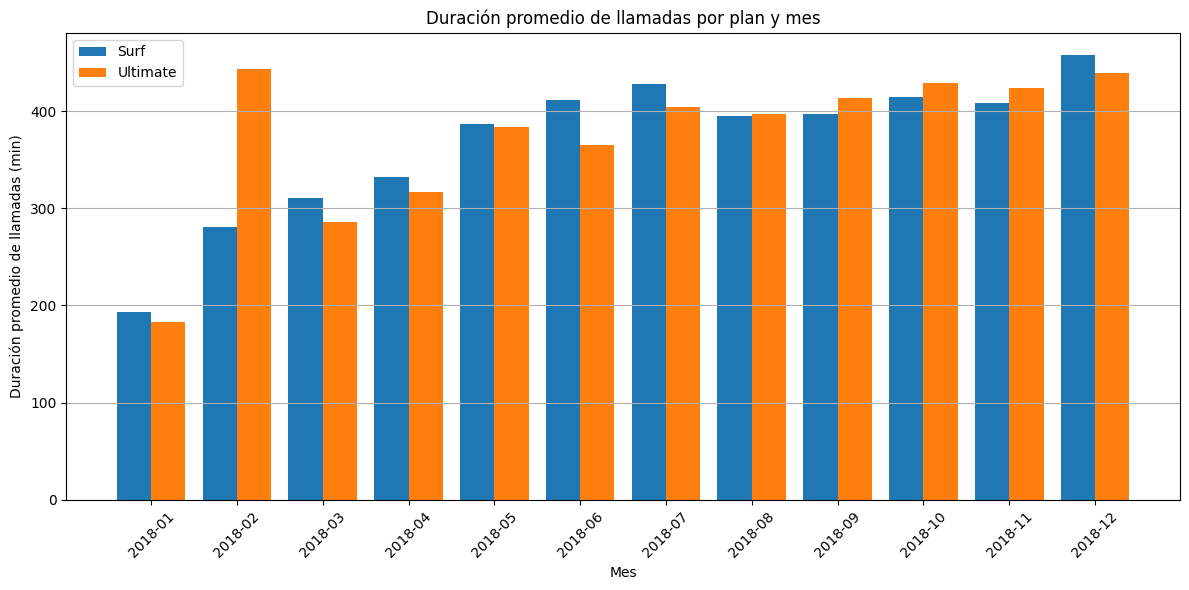

In [255]:
avg_duration = monthly_summary.groupby(['plan', 'month'])['minutes_used'].mean().reset_index()
avg_duration.columns = ['plan', 'month', 'avg_minutes']
surf_data = avg_duration[avg_duration['plan'] == 'surf']
ultimate_data = avg_duration[avg_duration['plan'] == 'ultimate']
months = sorted(avg_duration['month'].unique())
plt.figure(figsize=(12, 6))
bar_width = 0.4
x = range(len(months))
plt.bar([i - bar_width / 2 for i in x], surf_data['avg_minutes'], width=bar_width, label='Surf')
plt.bar([i + bar_width / 2 for i in x], ultimate_data['avg_minutes'], width=bar_width, label='Ultimate')
plt.xticks(ticks=x, labels=[str(m) for m in months], rotation=45)
plt.xlabel('Mes')
plt.ylabel('Duración promedio de llamadas (min)')
plt.title('Duración promedio de llamadas por plan y mes')
plt.legend()
plt.tight_layout()
plt.grid(axis='y')
plt.show()
# Compara la duración promedio de llamadas por cada plan y por cada mes. Traza un gráfico de barras para visualizarla.

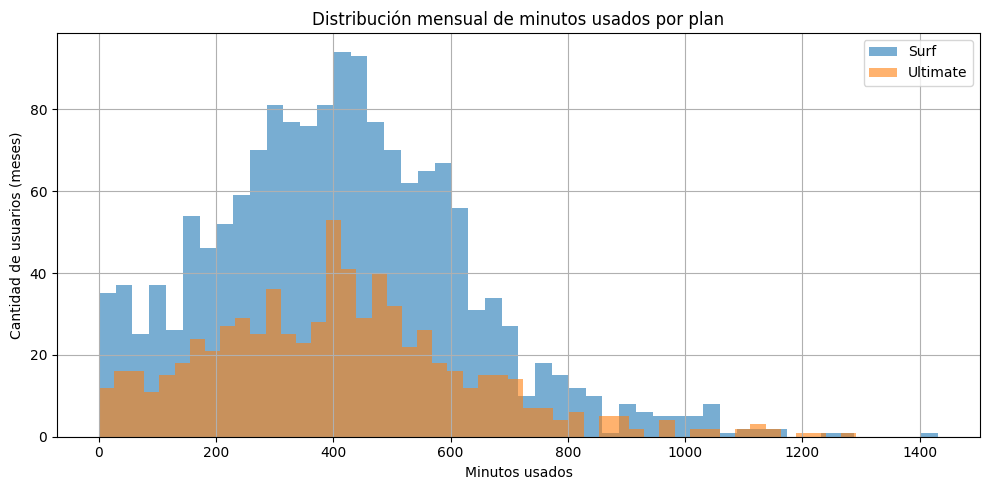

In [256]:
surf = monthly_summary[monthly_summary['plan'] == 'surf']['minutes_used'].dropna()
ultimate = monthly_summary[monthly_summary['plan'] == 'ultimate']['minutes_used'].dropna()
plt.figure(figsize=(10, 5))

plt.hist(surf, bins=50, alpha=0.6, label='Surf')
plt.hist(ultimate, bins=50, alpha=0.6, label='Ultimate')

plt.title('Distribución mensual de minutos usados por plan')
plt.xlabel('Minutos usados')
plt.ylabel('Cantidad de usuarios (meses)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
# Compara el número de minutos mensuales que necesitan los usuarios de cada plan. Traza un histograma.

In [257]:
call_stats = monthly_summary.groupby('plan')['minutes_used'].agg(['mean', 'var']).reset_index()
call_stats.columns = ['Plan', 'Media_duracion', 'Varianza_duracion']
display(call_stats)
# Calcula la media y la varianza de la duración mensual de llamadas.

,Plan,Media_duracion,Varianza_duracion
0,surf,412.097890,47001.254231
1,ultimate,410.180954,50510.631705


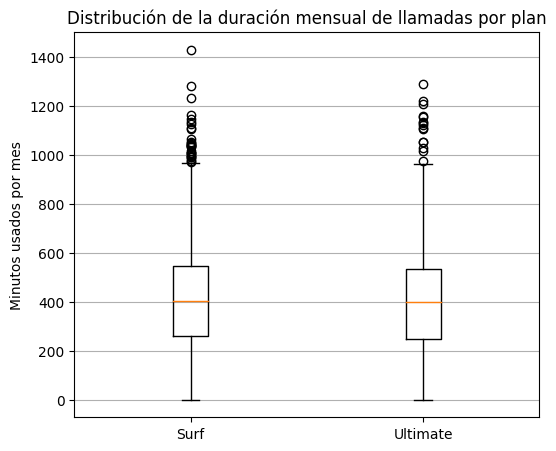

In [258]:
import matplotlib.pyplot as plt
surf_minutes = monthly_summary[monthly_summary['plan'] == 'surf']['minutes_used'].dropna()
ultimate_minutes = monthly_summary[monthly_summary['plan'] == 'ultimate']['minutes_used'].dropna()
data = [surf_minutes, ultimate_minutes]
labels = ['Surf', 'Ultimate']
plt.figure(figsize=(6, 5))
plt.boxplot(data, labels=labels)
plt.title('Distribución de la duración mensual de llamadas por plan')
plt.ylabel('Minutos usados por mes')
plt.grid(True, axis='y')
plt.show()

# Traza un diagrama de caja para visualizar la distribución de la duración mensual de llamadas

Los usuarios de ambos planes tienen una duración mensual de llamadas similar en promedio, pero su comportamiento presenta diferencias importantes. Los usuarios del plan Surf tienden a usar ligeramente más minutos y su distribución es más homogénea, con la mayoría concentrándose entre 300 y 500 minutos mensuales. En cambio, los usuarios del plan Ultimate muestran un uso más variable, con una mayor dispersión y presencia de valores atípicos, aunque en general utilizan menos minutos que los de Surf. Esto sugiere que, aunque el promedio sea parecido, los usuarios de Ultimate tienen un comportamiento menos predecible, mientras que los de Surf hacen un uso más constante del servicio de llamadas.

### Mensajes

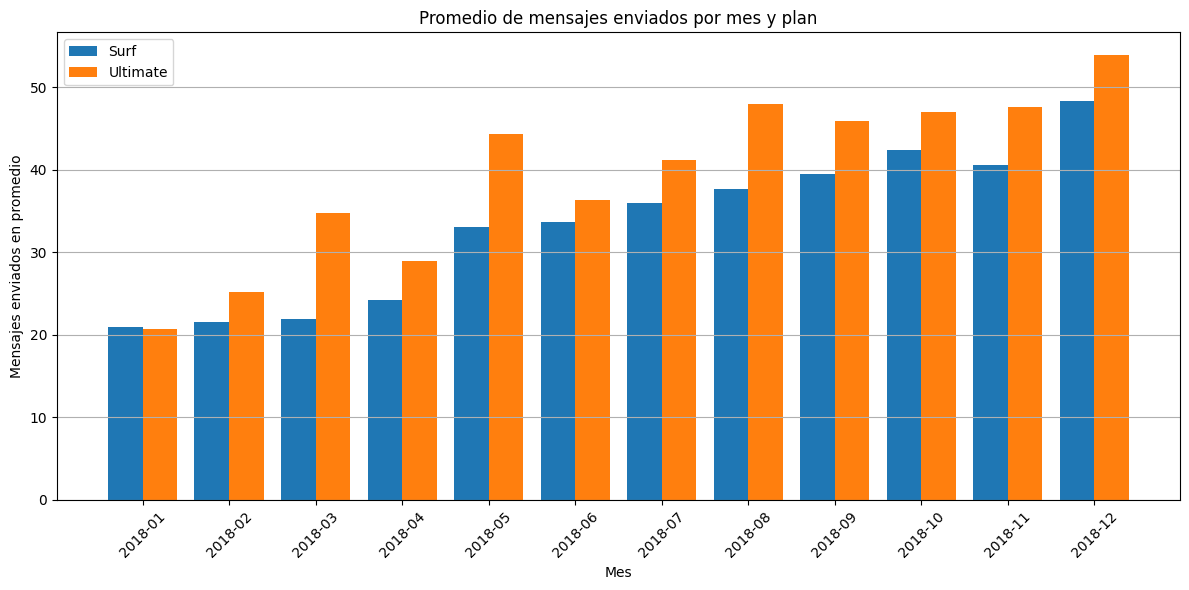

In [259]:
avg_messages = monthly_summary.groupby(['plan', 'month'])['messages_sent'].mean().reset_index()
avg_messages.columns = ['plan', 'month', 'avg_messages']
surf_msgs = avg_messages[avg_messages['plan'] == 'surf']
ultimate_msgs = avg_messages[avg_messages['plan'] == 'ultimate']
months = sorted(avg_messages['month'].unique())
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
bar_width = 0.4
x = range(len(months))
plt.bar([i - bar_width / 2 for i in x], surf_msgs['avg_messages'], width=bar_width, label='Surf')
plt.bar([i + bar_width / 2 for i in x], ultimate_msgs['avg_messages'], width=bar_width, label='Ultimate')
plt.xticks(ticks=x, labels=[str(m) for m in months], rotation=45)
plt.xlabel('Mes')
plt.ylabel('Mensajes enviados en promedio')
plt.title('Promedio de mensajes enviados por mes y plan')
plt.legend()
plt.grid(axis='y')
plt.tight_layout()
plt.show()
# Comprara el número de mensajes que tienden a enviar cada mes los usuarios de cada plan

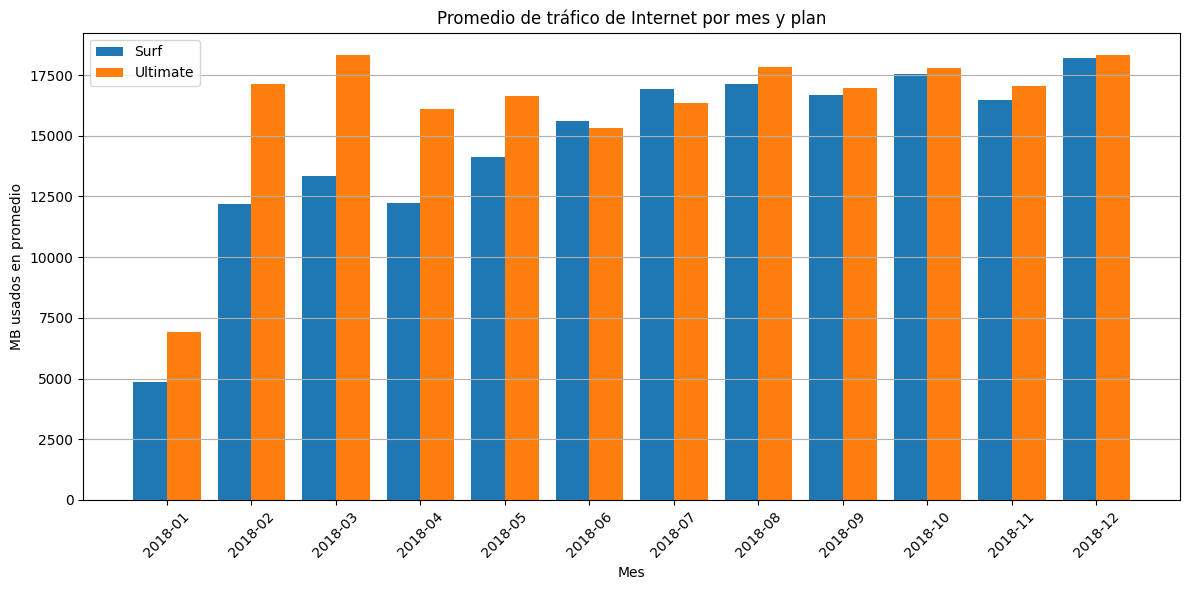

In [260]:
avg_data = monthly_summary.groupby(['plan', 'month'])['mb_used_total'].mean().reset_index()
avg_data.columns = ['plan', 'month', 'avg_mb']
surf_data = avg_data[avg_data['plan'] == 'surf']
ultimate_data = avg_data[avg_data['plan'] == 'ultimate']
months = sorted(avg_data['month'].unique())
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
bar_width = 0.4
x = range(len(months))
plt.bar([i - bar_width / 2 for i in x], surf_data['avg_mb'], width=bar_width, label='Surf')
plt.bar([i + bar_width / 2 for i in x], ultimate_data['avg_mb'], width=bar_width, label='Ultimate')
plt.xticks(ticks=x, labels=[str(m) for m in months], rotation=45)
plt.xlabel('Mes')
plt.ylabel('MB usados en promedio')
plt.title('Promedio de tráfico de Internet por mes y plan')
plt.legend()
plt.grid(axis='y')
plt.tight_layout()
plt.show()
# Compara la cantidad de tráfico de Internet consumido por usuarios por plan

Los usuarios del plan Ultimate tienden a enviar más mensajes por mes que los usuarios del plan Surf, y esta diferencia se mantiene de forma constante a lo largo del año. Mientras ambos grupos muestran un aumento progresivo en la cantidad de mensajes enviados, el plan Ultimate supera en promedio al plan Surf en cada mes, llegando a una diferencia de más de 10 mensajes en algunos periodos. Esto indica que el comportamiento de los usuarios sí varía según el plan contratado, siendo más activos en el envío de mensajes quienes cuentan con el plan Ultimate, posiblemente debido a que incluye una mayor cantidad de mensajes sin costo adicional.

### Internet

Los usuarios del plan Ultimate consumen más tráfico de Internet en promedio que los del plan Surf, especialmente durante los primeros meses del año, donde la diferencia es más notable. A lo largo del año, ambos planes muestran un aumento progresivo en el uso de datos, pero Ultimate mantiene consistentemente un nivel más alto de consumo mensual. Esto sugiere que el comportamiento de los usuarios sí varía en función del plan contratado, siendo los de Ultimate más intensivos en el uso de internet, posiblemente debido a los beneficios incluidos en su plan que permiten un mayor volumen de navegación sin preocuparse por cargos adicionales.

## Ingreso

In [261]:
import numpy as np

def calculate_cost(row):
    # Uso real
    minutes_used = np.nan_to_num(row.get('minutes_used', 0), nan=0.0)
    messages_sent = np.nan_to_num(row.get('messages_sent', 0), nan=0.0)
    mb_used_total = np.nan_to_num(row.get('mb_used_total', 0), nan=0.0)

    # Límites del plan
    minutes_included = np.nan_to_num(row.get('minutes_included', 0), nan=0.0)
    messages_included = np.nan_to_num(row.get('messages_included', 0), nan=0.0)
    gb_included = np.nan_to_num(row.get('gb_per_month_included', 0), nan=0.0)

    # Precios
    usd_per_minute = np.nan_to_num(row.get('usd_per_minute', 0), nan=0.0)
    usd_per_message = np.nan_to_num(row.get('usd_per_message', 0), nan=0.0)
    usd_per_gb = np.nan_to_num(row.get('usd_per_gb', 0), nan=0.0)
    usd_monthly_pay = np.nan_to_num(row.get('usd_monthly_pay', 0), nan=0.0)

    # Excesos
    extra_minutes = max(0, round(minutes_used - minutes_included))
    extra_messages = max(0, round(messages_sent - messages_included))
    extra_gb = max(0, int(mb_used_total // 1024) - gb_included)

    # Total
    total = (
        usd_monthly_pay +
        extra_minutes * usd_per_minute +
        extra_messages * usd_per_message +
        extra_gb * usd_per_gb
    )

    return round(total, 2)

In [262]:
monthly_summary['monthly_revenue'] = monthly_summary.apply(calculate_cost, axis=1)

In [263]:
revenue_stats = monthly_summary.groupby('plan')['monthly_revenue'].describe()
display(revenue_stats)

,count,mean,std,min,25%,50%,75%,max
plan,,,,,,,,
surf,1573.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ultimate,720.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [264]:
monthly_summary = monthly_summary.merge(plans, left_on='plan', right_on='plan_name', how='left')
display(monthly_summary[['plan', 'usd_monthly_pay', 'usd_per_minute', 'minutes_included']].head())

,plan,usd_monthly_pay,usd_per_minute,minutes_included
0,ultimate,70,0.01,3000
1,surf,20,0.03,500
2,surf,20,0.03,500
3,surf,20,0.03,500
4,surf,20,0.03,500


In [265]:
monthly_summary['monthly_revenue'] = monthly_summary.apply(calculate_cost, axis=1)

In [266]:
revenue_stats = monthly_summary.groupby('plan')['monthly_revenue'].describe()
display(revenue_stats)

,count,mean,std,min,25%,50%,75%,max
plan,,,,,,,,
surf,1573.0,54.535817,52.424711,20.0,20.0,30.93,70.0,578.63
ultimate,720.0,71.915278,10.094121,70.0,70.0,70.00,70.0,175.00


El plan Ultimate genera mayores ingresos promedio por usuario mensual que el plan Surf (71.92 USD vs 54.54 USD). Además, los ingresos de Ultimate son mucho más estables, con una desviación estándar baja de 10 USD, lo que refleja su estructura de tarifa plana. En contraste, el plan Surf presenta una gran variabilidad desviación estándar de 52 USD, lo cual sugiere que algunos usuarios superan ampliamente los límites del plan, generando ingresos más altos en ciertos meses. Esto implica que Ultimate es más predecible en términos de ingreso, mientras que Surf puede ser más rentable en casos específicos pero con mayor incertidumbre.

<div class="alert alert-block alert-success">
<b>Comentario revisor</b> <a class="tocSkip"></a>

 Muy buena prática la de usar distintos tipos de gráficas identificar algunos hallazgos y llegar a conclusiones. En este caso las gráficas de box-plots nos ayudan a identificar outiers que pueden sesgar nuestros resultados, especificamente las pruebas de hipótesis. Es por ello que con estás gráficas puedes complementar el análisis eliminando los valores atipicos. 
</div>

## Prueba las hipótesis estadísticas

In [267]:
# Hipótesis:
# H0: Los ingresos promedio de los planes Ultimate y Surf son iguales.
# H1: Los ingresos promedio de los planes Ultimate y Surf son diferentes.

# Nivel de significancia
alpha = 0.05

# Extraer los ingresos por plan
surf = monthly_summary[monthly_summary['plan'] == 'surf']['monthly_revenue']
ultimate = monthly_summary[monthly_summary['plan'] == 'ultimate']['monthly_revenue']

# Realizar la prueba t de Welch (no asume varianzas iguales)
from scipy import stats
t_stat, p_value = stats.ttest_ind(surf, ultimate, equal_var=False)

print(f'Estadístico t: {t_stat:.4f}')
print(f'Valor p: {p_value:.4f}')

# Evaluar resultado
if p_value < alpha:
    print("Rechazamos H0: Hay una diferencia significativa entre los ingresos promedio de los planes.")
else:
    print("No se puede rechazar H0: No hay suficiente evidencia de una diferencia significativa.")
# Prueba las hipótesis

Estadístico t: -12.6460
Valor p: 0.0000
Rechazamos H0: Hay una diferencia significativa entre los ingresos promedio de los planes.


In [268]:
monthly_summary = monthly_summary.merge(users[['user_id', 'city']], on='user_id', how='left')

In [269]:
# Hipótesis:
# H0: El ingreso promedio de los usuarios del área NY-NJ es igual al de otras regiones.
# H1: El ingreso promedio de los usuarios del área NY-NJ es diferente al de otras regiones.

# Nivel de significancia
alpha = 0.05

# Crear dos grupos: NY-NJ vs otras regiones
ny_nj = monthly_summary[monthly_summary['city'].str.contains('NY', case=False, na=False) | 
                        monthly_summary['city'].str.contains('NJ', case=False, na=False)]['monthly_revenue']

otras = monthly_summary[~(monthly_summary['city'].str.contains('NY', case=False, na=False) | 
                          monthly_summary['city'].str.contains('NJ', case=False, na=False))]['monthly_revenue']

# Prueba t de Welch
from scipy import stats
t_stat, p_value = stats.ttest_ind(ny_nj, otras, equal_var=False)

print(f'Estadístico t: {t_stat:.4f}')
print(f'Valor p: {p_value:.4f}')

# Evaluación del resultado
if p_value < alpha:
    print("Rechazamos H0: Hay una diferencia significativa en el ingreso promedio entre NY-NJ y otras regiones.")
else:
    print("No se puede rechazar H0: No hay suficiente evidencia de diferencia en el ingreso promedio.")
# Prueba las hipótesis

Estadístico t: -0.9344
Valor p: 0.3504
No se puede rechazar H0: No hay suficiente evidencia de diferencia en el ingreso promedio.


<div class="alert alert-block alert-success">
<b>Comentario revisor</b> <a class="tocSkip"></a>

Gran trabajo desarrollando las pruebas de hipótesis.

## Conclusión general

El objetivo de este análisis fue determinar cuál de los dos planes de prepago, Surf o Ultimate, genera mayores ingresos para la empresa Megaline. Para ello, se cargaron y procesaron cinco bases de datos, se realizaron transformaciones relevantes (como convertir fechas, agrupar por usuario y mes, y calcular consumo mensual), y se estimaron los ingresos generados por cada cliente de acuerdo con las condiciones del plan contratado.

Durante el análisis se observó que, aunque el plan Surf tiene un costo mensual más bajo, sus usuarios frecuentemente superan los límites incluidos, generando cargos adicionales y una mayor variabilidad en los ingresos. Por otro lado, el plan Ultimate ofrece un ingreso más estable y predecible, con una media mensual de 71.92 USD frente a 54.54 USD del plan Surf. Esta diferencia fue confirmada como estadísticamente significativa mediante una prueba de hipótesis.

Además, se concluyó que el comportamiento de los usuarios varía según el plan, especialmente en el uso de mensajes e internet, siendo más intensivo en el plan Ultimate. Sin embargo, al analizar los ingresos por región, no se encontró evidencia estadísticamente significativa de diferencia entre los usuarios de NY-NJ y otras regiones.

En resumen, el plan Ultimate es más rentable en términos de ingresos promedio y estabilidad, lo que sugiere que podría ser más conveniente para Megaline enfocar sus esfuerzos de marketing en promocionar este plan.